<a href="https://colab.research.google.com/github/MoffatKirui/TheBulliesproject/blob/main/The_Bullies_NoteBook_of_the_Analysis_of_PlayStore_App_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context of the Study

**Problem Statement**

In a perfect world, developers come with a creative and passionate expression of their work and share it with the rest of the world through an application. The intent behind most developers’ actions is to make something that impacts their lives in a meaningful way enough for them to download them. However, the reality of the matter is that even the most beautiful of applications with the highest of functionalities may very well go unnoticed by the masses. Our research and analysis aims to address this frustrating disparity by providing insights to software developers into which factors may affect how many times an app is installed from the Play Store market.


## Data Source

We have one dataset containing all our data and the source can be found here: [source](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv).

Column descriptions:

* App : Name of the app
* Category : Category of the app
* Rating: On a scale of 0 to 5
* Reviews
* Size: In megabytes or kilobytes
* Installs: Floor number of installs of the apps
* Type: Free or Paid
* Price: In dollars
* Content Rating : Everyone, Teen, 10+, Mature 17+
* Genres: Various genres of the app: Medical, Business,   Lifestyle, Entertainment...
* Last Updated: Date when the app was last updated
* Current version: current version of the app
* Android Version: which Android Version supports the app


# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data into the environment

In [ ]:
playstore = pd.read_csv('googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
playstore.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
playstore.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7814,CS Customizer,COMMUNICATION,3.7,25,3.7M,"1,000+",Free,0,Everyone,Communication,"February 6, 2017",1.2.11,3.0 and up
9956,CHOSEN - EV Smart Charger,AUTO_AND_VEHICLES,NaN,1,19M,10+,Free,0,Everyone,Auto & Vehicles,"August 7, 2018",3.4.4,4.2 and up
3045,ESPN Fantasy Sports,SPORTS,4.0,176450,10M,"5,000,000+",Free,0,Everyone,Sports,"November 21, 2017",5.3.0,4.4 and up
5403,AO/OTA Fracture Classification,MEDICAL,4.9,25,46M,"5,000+",Free,0,Everyone,Medical,"April 17, 2018",1.0,5.0 and up
3594,BookBaby - Baby Development,PARENTING,4.6,1002,5.0M,"50,000+",Free,0,Everyone,Parenting,"August 18, 2016",3.0,4.0.3 and up


# Data Validation

The validity of the data can be confirmed from a Google Play Store search of an entry within the data set. The link to the corresponding Play Store search can be found [here](https://play.google.com/store/apps/details?id=me.HarshV23.PiDark&hl=en&gl=US) and it corresponds to this entry: 

In [ ]:
playstore.loc[4490, : ]

App               Pi Dark [substratum]
Category               PERSONALIZATION
Rating                             4.5
Reviews                            189
Size                              2.1M
Installs                       10,000+
Type                              Free
Price                                0
Content Rating                Everyone
Genres                 Personalization
Last Updated            March 27, 2018
Current Ver                        1.1
Android Ver                        NaN
Name: 4490, dtype: object

# General Data Cleaning

In [ ]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# reviewing the anomaly
playstore[playstore['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# this presents an anomaly that is bound to be deleted.

In [ ]:
playstore = playstore[playstore['Content Rating'].notna()]
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
# Fixing the missing Android version

playstore[playstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [ ]:
# Updating these missing values from The PlayStore

playstore.loc[4490, 'Android Ver'] = '8.1 and up'
playstore.loc[4453, 'Android Ver'] = '2.3 and up'

In [ ]:
playstore[playstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
playstore = playstore[playstore['Type'].notna()]
playstore.isnull().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

In [ ]:
playstore[playstore['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Dropping unnecesary columns

playstore = playstore.drop(['Current Ver', 'Last Updated'], axis=1)


In [ ]:
playstore['Rating'] = playstore['Rating'].fillna(0.0)
playstore.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Android Ver       0
dtype: int64

In [ ]:
playstore['Reviews']=playstore.Reviews.astype(int)

In [ ]:
playstore['Installs']=playstore['Installs'].str.replace(',','').str.replace('+','').astype(int)


In [ ]:
playstore.rename(columns={'Installs':'Floor_installs'},inplace=True)

In [ ]:
playstore['Price'] = playstore['Price'].str.replace('$','').astype(float)

In [ ]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Floor_installs      int64
Type               object
Price             float64
Content Rating     object
Genres             object
Android Ver        object
dtype: object

In [ ]:
#checking for duplicates
playstore.duplicated().sum()

485

In [ ]:
playstore.drop_duplicates(inplace=True)

In [ ]:
playstore.head()

,App,Category,Rating,Reviews,Size,Floor_installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


In [ ]:
def memconverter(iterable):

  for i in range(len(iterable)):

    if 'Varies with device' in iterable[i]:
      iterable[i] = float(iterable[i].replace('Varies with device', '0'))

    elif 'M' in iterable[i]:
      iterable[i] = float(iterable[i].replace('M', '')) * 1000
      
    elif 'k' in iterable[i]:
      iterable[i] = float(iterable[i].replace('k', ''))
    
    
  return iterable

memconverter(playstore['Size'].values)

array([19000.0, 14000.0, 8700.0, ..., 9500.0, 0.0, 19000.0], dtype=object)

In [ ]:
playstore.rename(columns={'Size': 'Size(kb)'}, inplace=True)
playstore.tail()

,App,Category,Rating,Reviews,Size(kb),Floor_installs,Type,Price,Content Rating,Genres,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000,5000,Free,0.0,Everyone,Education,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600,100,Free,0.0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,0.0,3,9500,1000,Free,0.0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000,10000000,Free,0.0,Everyone,Lifestyle,Varies with device


# Exporting the cleaned dataset

In [ ]:
playstore.to_csv('cleaned_playstore.csv')

In [ ]:
# Game exclusive dataset

game = playstore[playstore['Category']=='GAME']

game.to_csv('game_clean.csv')

# Data Analysis

## Univariate analysis

In [ ]:
playstore['Genres'].value_counts()

Tools                      841
Entertainment              588
Education                  527
Business                   427
Medical                    408
                          ... 
Role Playing;Education       1
Strategy;Creativity          1
Comics;Creativity            1
Entertainment;Education      1
Trivia;Education             1
Name: Genres, Length: 119, dtype: int64

In [ ]:
# Finding the mean of the dataset

playstore[['Rating', 'Size(kb)', 'Price']].mean()

Rating          3.595741
Size(kb)    18153.791626
Price           1.031099
dtype: float64

In [ ]:
# Finding the mode of the dataset

playstore[['Rating', 'Size(kb)', 'Price']].mode()

,Rating,Size(kb),Price
0,0.0,0,0.0


In [ ]:
# Finding the median of the dataset

playstore[['Rating', 'Size(kb)', 'Price']].median()

Rating         4.2
Size(kb)    9100.0
Price          0.0
dtype: float64

In [ ]:
# Finding the variance 

playstore[['Rating', 'Size(kb)', 'Price']].var()   

Rating      2.363746e+00
Size(kb)    4.902230e+08
Price       2.650701e+02
dtype: float64

In [ ]:
# Finding the standard deviation

playstore[['Rating', 'Size(kb)', 'Price']].std().to_frame()  

,0
Rating,1.537448
Size(kb),22140.981117
Price,16.280974


In [ ]:
# Finding the skewness

playstore[['Rating', 'Size(kb)', 'Price']].skew()

Rating      -1.707134
Size(kb)     1.709274
Price       23.320989
dtype: float64

In [ ]:
# Finding the kurtosis

playstore[['Rating', 'Size(kb)', 'Price']].kurt()

Rating        1.343351
Size(kb)      2.524720
Price       557.330092
dtype: float64

In [ ]:
# Getting data description

playstore[['Rating', 'Price']].describe()

,Rating,Price
count,10354.000000,10354.000000
mean,3.595741,1.031099
std,1.537448,16.280974
min,0.000000,0.000000
25%,3.700000,0.000000
50%,4.200000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


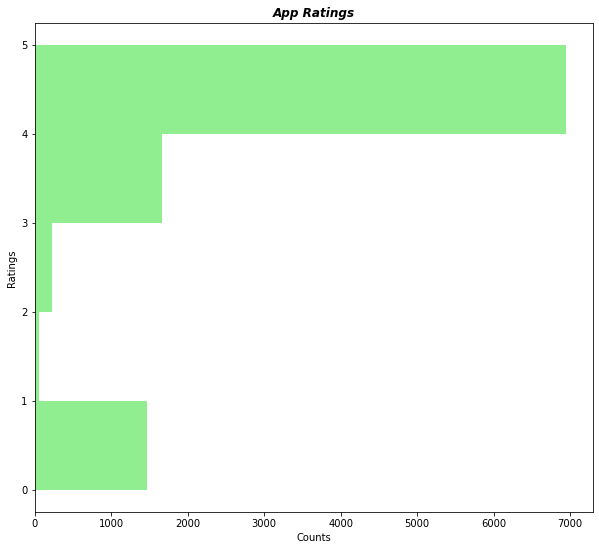

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,9))
plt.hist(playstore['Rating'], bins=5, histtype='bar', orientation='horizontal', color='lightgreen')
plt.title('App Ratings', fontweight='bold', style='italic')
plt.xlabel('Counts')
plt.ylabel('Ratings')
plt.show()

plt.savefig('App ratings.png')

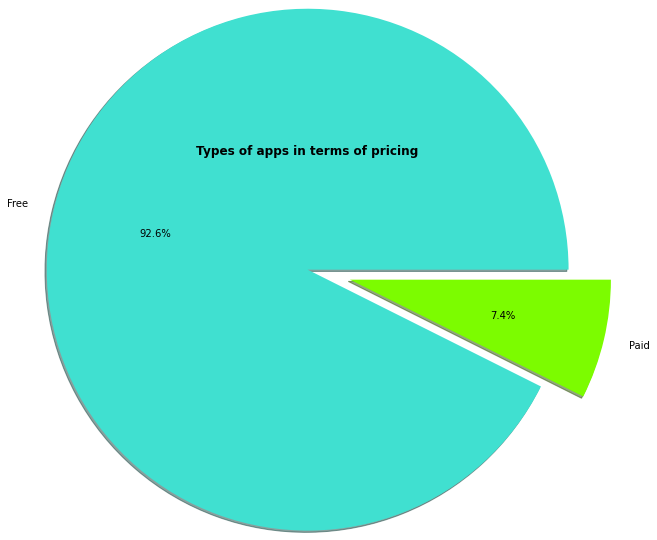

In [ ]:
plt.pie(playstore['Type'].value_counts().values, shadow=True, 
        colors=['turquoise', 'lawngreen'], autopct='%1.1f%%',
        labels=['Free', 'Paid'], radius= 3, explode=[0, 0.5])


plt.title('Types of apps in terms of pricing', fontweight='bold')

plt.savefig('Types of apps in terms of pricing.png')
plt.show()

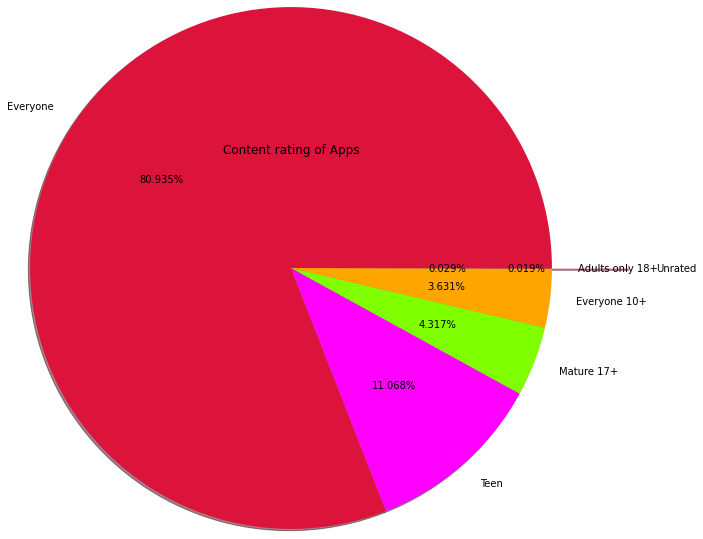

In [ ]:
plt.pie(playstore['Content Rating'].value_counts().values, 
        colors = ['crimson', 'magenta', 'chartreuse', 'orange', 'firebrick'],
        shadow=True, autopct='%1.3f%%', 
        labels = playstore['Content Rating'].value_counts().index, 
        radius=3, explode=[0,0,0,0,0, 0.9])

plt.title('Content rating of Apps')

plt.savefig('Content rating og apps distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


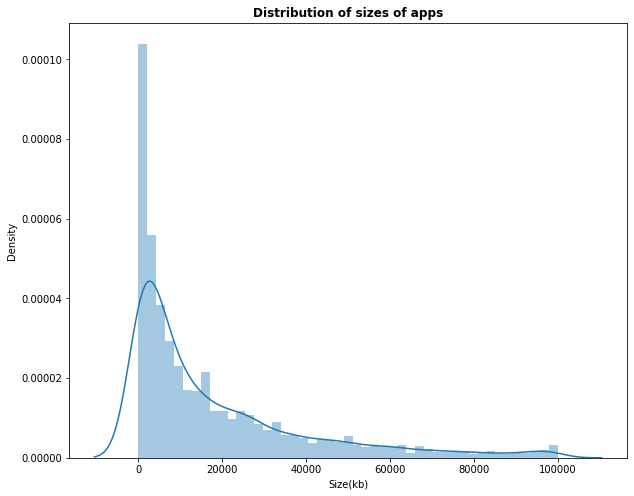

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(playstore['Size(kb)'])
plt.title('Distribution of sizes of apps', fontweight='bold')
plt.savefig('Distribution of app sizes.png')
plt.show()

Our means are as follows:
Rating          3.595741,
Size(kb)    18153.791626 and
Price           1.031099
Those apps that have received a rating of 4.0 and above are the most on the in our dataset accounting for close to 7,000 ratings with the least being those with a rating between 1 and 2 

The genres with the most apps are Tools with 841 apps,
Entertainment with 588 apps,
Education with 527 apps,
Business with 427 apps and
Medical with 408

Apps that are rated as being for everyone are the most in our dataset

Free apps are the most on our dataset accounting for 92.6% while those that are paid for account for 7.4%

The app size has a  positive skew






## Bivariate Analysis

In [ ]:
playstore.groupby('Type')[['Floor_installs']].sum()


,Floor_installs
Type,
Free,146542688646
Paid,69225881


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


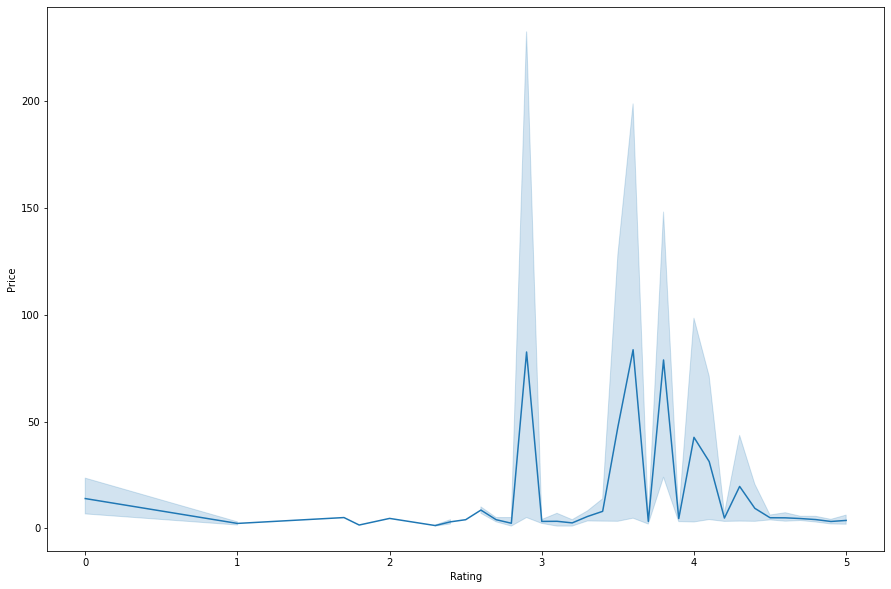

In [ ]:
paid=playstore[playstore['Type']=='Paid']

plt.figure(figsize=(15,10))
sns.lineplot(paid['Rating'],paid['Price'])
plt.show()



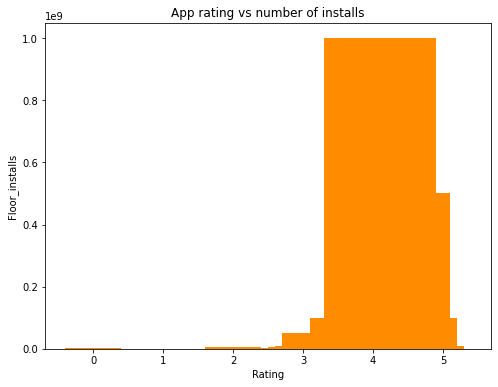

In [165]:
plt.figure(figsize=(8,6))
plt.bar(playstore['Rating'],playstore['Floor_installs'],color='darkorange')
plt.xlabel('Rating')
plt.ylabel('Floor_installs')
plt.title('App rating vs number of installs')
plt.savefig('App_rating_vs_installs.png')
plt.show()

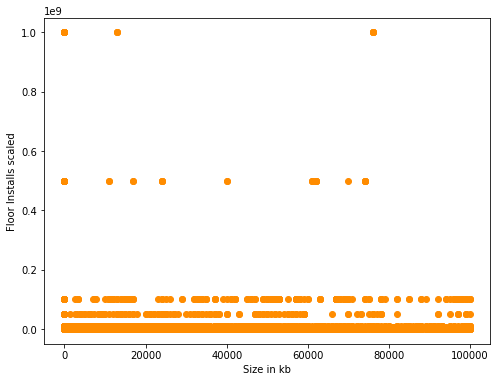

In [166]:
plt.figure(figsize=(8,6))
plt.scatter(playstore['Size(kb)'],playstore['Floor_installs'],color='darkorange')
plt.savefig('no_relatinship_b2n_size_installs.png')
plt.xlabel('Size in kb')
plt.ylabel('Floor Installs scaled')
plt.show()

# No clear relationship.
# 0 describes Varies with device

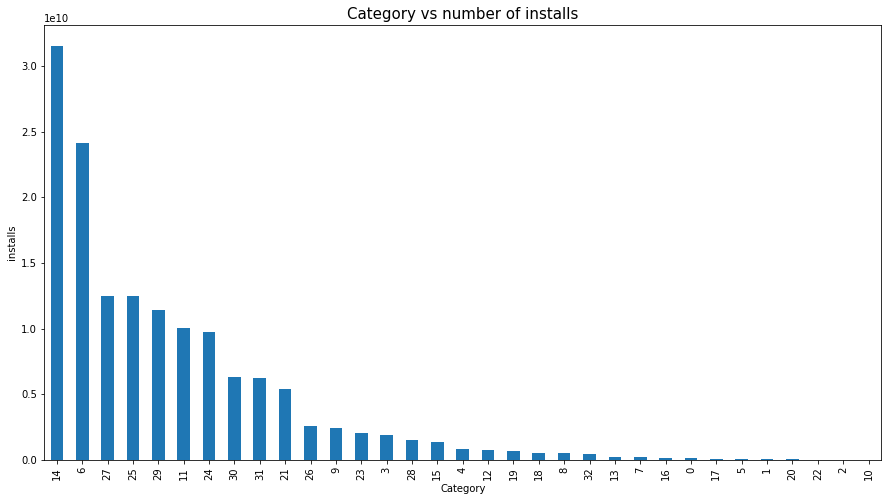

In [167]:
plt.figure(figsize=(15,8))
playstore.groupby('Category')['Floor_installs'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Category vs number of installs',size=15)
plt.ylabel('installs')
plt.savefig('category_v_installs.png')
plt.show()

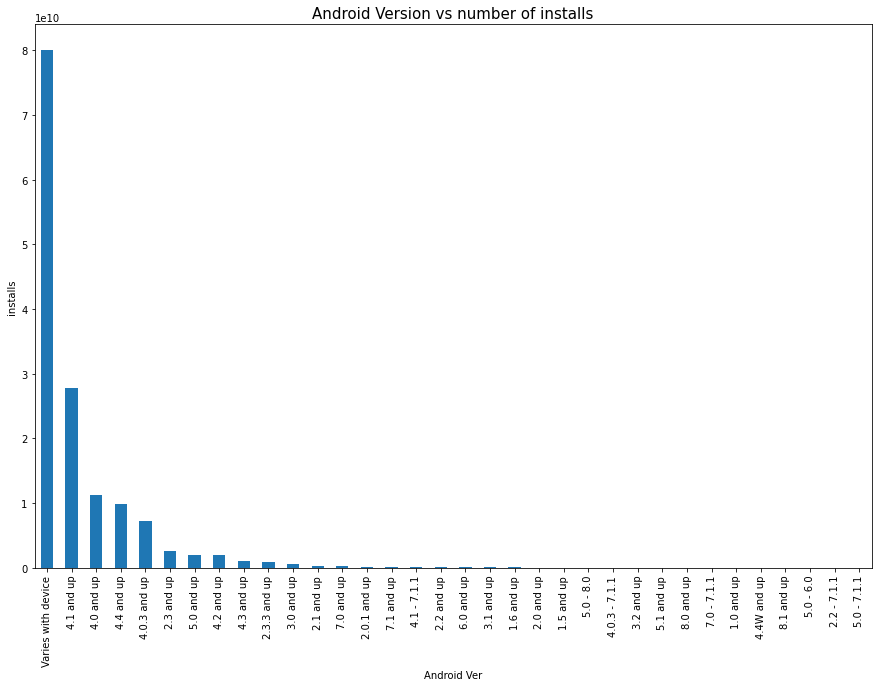

In [168]:
plt.figure(figsize=(15,10))
playstore.groupby('Android Ver')['Floor_installs'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Android Version vs number of installs',size=15)
plt.ylabel('installs')
plt.savefig('androidv_vs_installs.png')
plt.show()

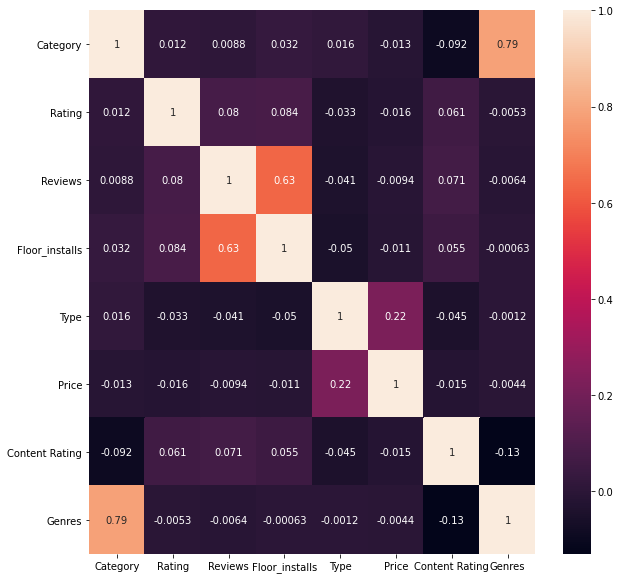

<Figure size 432x288 with 0 Axes>

In [169]:
plt.figure(figsize=(10,10))
sns.heatmap(playstore.corr(),annot=True)
plt.show()
plt.savefig('heatmap.png')

## Findings of Bivariate analysis



*   In terms of number of installs, the Free apps will always be greater than paid apps.

* A high priced app does not necessarily guarantee a high rating. Some of the highest rated apps are actually free ones. Though, some high priced apps also have a remarkably high rating
* The highest rated apps recorded a really high number of installs on Google PlayStore
* The data showed a poor correlation between size of apps and the number of installs. There are exceptions, however, where a large app also records quite a number of installs. Though it wasn't the norm.
* Game and Communication categories recorded the largest number of installs while Beauty and Event categories recorded the lowest.
* Most of the apps with the highest recorded installs had Varying Android Versions but the highest known Android Version was 4.1



# Solution implementation

In [ ]:
playstore.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

playstore['Content Rating'] = en.fit_transform(playstore['Content Rating'])
playstore['Genres'] = en.fit_transform(playstore['Genres'])
playstore['Category'] = en.fit_transform(playstore['Category'])


In [ ]:
playstore.head()

In [ ]:
playstore['Type'] = playstore['Type'].map({'Free': 0, 
                                          'Paid': 1})

In [ ]:
# Seperating features from the installs

x = playstore.drop(['App', 'Android Ver', 'Floor_installs', 'Reviews'], axis=1)
y = playstore['Floor_installs']

In [ ]:
# Training 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
# Feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=1)

 
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

In [ ]:
# Evaluating the performance

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))


An accuracy of 20.7% is achieved using just one component. Let's try challenging the solution with PCA.

In [ ]:
x = playstore.drop(['App', 'Android Ver', 'Floor_installs', 'Reviews'], axis=1)
y = playstore['Floor_installs']


print(x.shape, y.shape)

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
a, b = train_test_split(x, test_size=0.2, random_state=10)
print(a.shape, b.shape)

In [ ]:
c, d = train_test_split(y, test_size=0.2, random_state=10)
print(c.shape, d.shape)

In [ ]:
X_train = a
X_test = b
y_train = c
y_test = d

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Applying PCA

from sklearn.decomposition import PCA 
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Explained variance ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

In [ ]:
plt.bar(range(1,8), explained_variance, align='center')
plt.step(range(1,8), np.cumsum(explained_variance),
         where='mid', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal Components')
plt.show()

In [ ]:
#Using 6 components which explain 97% of the Variance

pca = PCA(n_components=6)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)



In [ ]:
# Training and making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)

# Predicitons

y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

print("Accuracy: " +str(accuracy_score(y_test, y_pred)))

 ## Interpretation of results.

Our features yielded prediction results as follows:


*   Principal Component Analysis yielded 19.8% accuracy while,
*   Linear Discriminant Analysis yielded 20.7% accuracy using the same features.

As clearly seen, our model could not confidently predict the number of installs based on Category, Price,Genre, Content Rating, Size and Type (free or paid) of the app.

# Hypothesis Testing

Null Hypothesis: An app with a 4.0 rating and above will have 1,000,000+ installs on average.

Alternate hypothesis: The number of installs will be lower than 1,000,000+ on average.

In [ ]:
ratings = playstore[playstore['Rating'] >= 4.0]
ratings.sample(5)

In [ ]:
# Creating a population of installs from the ratings df

installs_pop = ratings.Floor_installs.values
installs_pop

In [ ]:
# Finding out the size of the population

installs_pop.shape[0]

### Point estimate of the mean

The sample size needed for a confidence level of 0.95 was calculated using the following online [tool](http://www.raosoft.com/samplesize.html)

In [ ]:
# Since the are no clusters nor strata in the population, simple random sampling remains the best choice

np.random.seed(150)

install_sample = np.random.choice(a=installs_pop, size=365, replace=False)



# Sample mean
print(install_sample.mean())


In [ ]:
# Creating a bigger sample off of the discretion of the reseachers.
# sample size is nearly two fifths of the population

np.random.seed(23)


install_sample2 = np.random.choice(a=installs_pop, size=2500, replace=False)

# Sample mean

print("Bigger sample mean: ", install_sample2.mean())

# Mean difference from the Population

print("Mean difference = ", install_sample2.mean() - installs_pop.mean())

## Confidence interval for the difference of means

In [ ]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(installs_pop), sms.DescrStatsW(installs_sample2))


print("Confidence interval of the difference of means\n")

print("*" * 40)
print(cm.tconfint_diff(alpha=0.95, usevar='pooled'))

## Z Test

In [ ]:
zscore = (install_sample2.mean() - installs_pop.mean()) / installs_pop.std()

print(zscore)

In [ ]:
# Calculating the corresponding pvalue
from scipy.stats import norm

pvalue = norm.cdf(zscore)

if pvalue < 0.05:
  print(f"Reject null hypothesis in favor of Alternate hypothesis given a pvalue of {pvalue}")

else:
  print(f"Fail to reject null hypothesis with a pvalue of {pvalue}")

# Recommendations of the Study


From the following analysis, we have the subsequent recommendations:


1.   Paid apps rarely overshadow free apps in terms of installs.
2.   The best Android Version to develop for as a baseline is 4.1
3. Communication and Gaming apps are the most dominant and lucrative archetypes.
4. A highly rated application is most likely to be installed. Related to this, free apps are more accessible to people and therefore easily rated. Remember, the more the positive ratings, the higher the number of installs. 
Small PSA on this: suggesting to users to rate your app on the store is definitely worth the trouble it is.


